In [0]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [0]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels), (test_images,test_labels) = fashion_mnist.load_data()

6
[[  0   0   0   0   0   0   0   0   1   0   0   0 159 165 165 184 162   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   5   0   0   0   4 206 249 170 171 177 255 177
    0   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0  29 181 218 222 216 221 204 220 206 226
  253 146   8   0   0   1   0   0   0   0]
 [  0   0   0   1   1   0   0 135 221 224 210 207 220 208 199 210 208 210
  210 228 214 116   0   0   1   0   0   0]
 [  0   0   0   1   0   0 152 238 208 207 213 208 209 219 216 222 215 211
  211 206 210 236 128   0   0   0   0   0]
 [  0   0   0   2   0  52 224 212 209 210 205 208 208 208 207 206 208 207
  210 212 210 209 218  25   0   0   0   0]
 [  0   0   0   0   0 202 221 215 206 210 206 210 208 208 209 209 210 208
  210 210 210 208 222 188   0   0   0   0]
 [  0   0   0   0  55 221 206 223 202 208 210 208 206 210 207 207 207 206
  209 209 209 211 207 220  34   0   0   0]
 [  0   0   0   0 180 218 208 220 205 210 208 210 205 206 204 

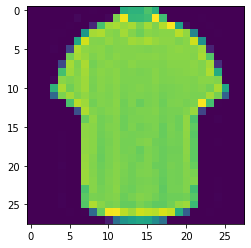

In [0]:
import matplotlib.pyplot as plt
plt.imshow(train_images[1142])
print(train_labels[1142])
print(train_images[1142])

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
train_images  = train_images / 255.0
test_images = test_images / 255.0

In [0]:
model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28,28)),
      keras.layers.Dense(128, activation=tf.nn.relu),
      keras.layers.Dense(10,activation=tf.nn.softmax)
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 75us/sample - loss: 0.4940 - acc: 0.8262
Epoch 2/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3735 - acc: 0.8646
Epoch 3/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3337 - acc: 0.8784
Epoch 4/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3109 - acc: 0.8852
Epoch 5/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2949 - acc: 0.8906


In [0]:
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 0s 36us/sample - loss: 0.3464 - acc: 0.8766


[0.346365251660347, 0.8766]

In [0]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.4761 - acc: 0.8300
Epoch 2/5
60000/60000 [==============================] - 7s 120us/sample - loss: 0.3569 - acc: 0.8699
Epoch 3/5
60000/60000 [==============================] - 7s 122us/sample - loss: 0.3236 - acc: 0.8806
Epoch 4/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.2976 - acc: 0.8899
Epoch 5/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.2793 - acc: 0.8964


In [0]:
# Convolution and Pooling layers for classification of Fashion MNIST

In [0]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels), (test_images,test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape(60000,28,28,1)
train_images = train_labels/255.0
test_images = test_images.reshape(10000,28,28,1)
test_images = test_labels/255.0
model = keras.Sequential([
      keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
      keras.layers.MaxPooling2D(2,2),
      keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
      keras.layers.MaxPooling2D(2,2),
      keras.layers.Flatten(input_shape=(28,28)),
      keras.layers.Dense(128, activation=tf.nn.relu),
      keras.layers.Dense(10,activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.summary
model.fit(train_images,train_labels,epochs=5)
test_loss = model.evaluate(test_images,test_labels)

ValueError: ignored